In [2]:
import pulp

In [20]:
prob1 = pulp.LpProblem("My LP Problem", pulp.LpMinimize)

In [21]:
x = pulp.LpVariable('x', lowBound=1, upBound=5, cat='Continuous')
y = pulp.LpVariable('y', lowBound=2, cat='Continuous')

In [22]:
prob1 += 4 * x + 3 * y
prob1 += 5 * x - 3 * y

c:\users\bhask\appdata\local\programs\python\python35\lib\site-packages\pulp\pulp.py:1349: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


In [15]:
prob += 2 * y <= 25 - x
prob += 4 * y >= 2 * x - 8
prob += y <= 2 * x - 5

In [23]:
prob1

My LP Problem:
MINIMIZE
5*x + -3*y + 0
VARIABLES
1 <= x <= 5 Continuous
2 <= y Continuous

In [24]:
prob.solve()

1

In [27]:
for var in prob.variables():
    print(var.name, var.varValue)

x 3.5
y 2.0


int cost_cte = 1500;
int cost_eps = 500;
int cost_v = 1;
int cost_current_delta = 50;
int cost_current_a = 25;
int cost_diff_delta = 300;
int cost_diff_a = 125;

In [12]:
ref_vel = 49.5
delta = 0
a = 1
epsi = 0
cte = 1

In [ ]:
prob = pulp.LpProblem("MPC", pulp.LpMinimize)


In [28]:
x_[t+1] = x[t] + v[t] * cos(psi[t]) * dt
y_[t+1] = y[t] + v[t] * sin(psi[t]) * dt
psi_[t+1] = psi[t] + v[t] / Lf * delta[t] * dt
v_[t+1] = v[t] + a[t] * dt

NameError: name 't' is not defined

start Kinematic Bicycle model simulation


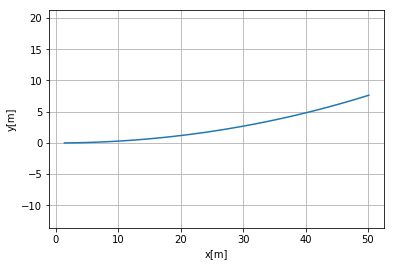

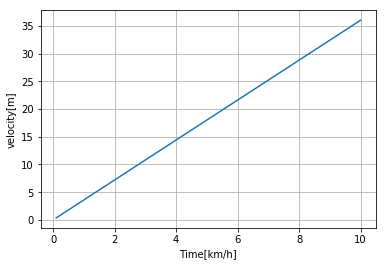

In [29]:
#! /usr/bin/python
# -*- coding: utf-8 -*-
"""
Kinematic Bicycle Model

author Atsushi Sakai
"""

import math

dt = 0.1  # [s]
L = 2.9  # [m]
Lr = 1.4  # [m]


class State:

    def __init__(self, x=Lr, y=0.0, yaw=0.0, v=0.0, beta=0.0):
        self.x = x
        self.y = y
        self.yaw = yaw
        self.v = v
        self.beta = beta


def update(state, a, delta):

    state.beta = math.atan2(Lr / L * math.tan(delta), 1.0)

    state.x = state.x + state.v * math.cos(state.yaw + state.beta) * dt
    state.y = state.y + state.v * math.sin(state.yaw + state.beta) * dt
    state.yaw = state.yaw + state.v / Lr * math.sin(state.beta) * dt
    state.v = state.v + a * dt

    #  print(state.x, state.y, state.yaw, state.v)

    return state


if __name__ == '__main__':
    print("start Kinematic Bicycle model simulation")
    import matplotlib.pyplot as plt
    import numpy as np

    T = 100
    a = [1.0] * T
    delta = [math.radians(1.0)] * T
    #  print(a, delta)

    state = State()

    x = []
    y = []
    yaw = []
    v = []
    beta = []
    time = []
    time = []
    t = 0.0

    for (ai, di) in zip(a, delta):
        t = t + dt
        state = update(state, ai, di)
        x.append(state.x)
        y.append(state.y)
        yaw.append(state.yaw)
        v.append(state.v)
        beta.append(state.beta)
        time.append(t)

    flg, ax = plt.subplots(1)
    plt.plot(x, y)
    plt.xlabel("x[m]")
    plt.ylabel("y[m]")
    plt.axis("equal")
    plt.grid(True)

    flg, ax = plt.subplots(1)
    plt.plot(time, np.array(v) * 3.6)
    plt.xlabel("Time[km/h]")
    plt.ylabel("velocity[m]")
    plt.grid(True)

    #  flg, ax = plt.subplots(1)
    #  plt.plot([math.degrees(ibeta) for ibeta in beta])
    #  plt.grid(True)

    plt.show()


In [30]:
math.radians(1)

0.017453292519943295